# EE656 Intro To Big Data Analytics
# Homework 1 
# Summer 2023 
# Zachary Chou 

# Part A: Data Preprocessing 

In [1]:
# Import libraries numpy, pandas, matplotlib.pyplot
import numpy as np
import statistics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
# Read the csv file 
diabetics = pd.read_csv('diabetic_data.csv')

print(diabetics) 

        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_

In [3]:
# Dropping medication columns for data cleaning since column diabetesMed shows whether patient has 
# taken diabetes medications or not and additonal columns as they can be considered as negeliable for 
# analysis include number outpatient, emergency, inpatient since those are not important factors to consider whether 
# a person has diabeties or not and diag_1, diag_2, and diag_3 since there is already a column for number of 
# diagnoses for each patient and prayer code since it will not be observed for data analysis and change for the same reason 

diabetics.drop(diabetics.columns[[6,7,8,10,15,16,17,18,19,20,
                                  24,25,26,27,28,29,30,31,32,33,34,35,
                                  36,37,38,39,40,41,42,43,44,45,46,47]],axis=1,inplace=True)

print(diabetics)


        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        time_in_hospital         medical_specialty  num_lab_pro

In [4]:
# Seeing the value counts for each categorial column and if there is any missing data 

print(diabetics.race.value_counts())

print(diabetics.gender.value_counts())

print(diabetics.age.value_counts())

print(diabetics.weight.value_counts())

print(diabetics.time_in_hospital.value_counts())

print(diabetics.medical_specialty.value_counts())

print(diabetics.num_lab_procedures.value_counts())

print(diabetics.num_procedures.value_counts())

print(diabetics.num_medications.value_counts())

print(diabetics.number_diagnoses.value_counts())

print(diabetics.max_glu_serum.value_counts())

print(diabetics.A1Cresult.value_counts())

print(diabetics.diabetesMed.value_counts())

print(diabetics.readmitted.value_counts())


Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64
?                                49949
InternalMedicine                 14635
Emergency/Trauma   

In [5]:
# Columns race, weight, and medical_speciality have ?'s and need to be account for as shown

diabetics.replace('?', np.nan, inplace=True)
diabetics.dropna(inplace=True)
print(diabetics.race.value_counts())
print(diabetics.weight.value_counts())
print(diabetics.medical_specialty.value_counts())

print(diabetics)

Caucasian          1496
AfricanAmerican      51
Other                21
Asian                 1
Name: race, dtype: int64
[75-100)     678
[50-75)      440
[100-125)    300
[125-150)     63
[25-50)       43
[0-25)        20
[150-175)     19
[175-200)      6
Name: weight, dtype: int64
Cardiology                 572
InternalMedicine           407
Surgery-General            373
Family/GeneralPractice     150
ObstetricsandGynecology     33
Psychiatry                  23
Pediatrics                  10
Dentistry                    1
Name: medical_specialty, dtype: int64
        encounter_id  patient_nbr             race  gender      age  \
1102         8042082     94466574        Caucasian    Male  [50-60)   
1132         8235036     79874631        Caucasian  Female  [60-70)   
1190         8421486     55628172        Caucasian  Female  [70-80)   
1204         8576406     80041266        Caucasian  Female  [80-90)   
1214         8620524     93126573        Caucasian  Female  [50-60)   
... 

In [6]:
# changing all categorial data into numerical so that data visualization can be performed 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
diabetics['race'] = le.fit_transform(diabetics.race)

le1 = LabelEncoder()
diabetics['gender'] = le.fit_transform(diabetics.gender)

le2 = LabelEncoder()
diabetics['medical_specialty'] = le.fit_transform(diabetics.medical_specialty)

le3 = LabelEncoder()
diabetics['max_glu_serum'] = le.fit_transform(diabetics.max_glu_serum)

le4 = LabelEncoder()
diabetics['A1Cresult'] = le.fit_transform(diabetics.A1Cresult)

le5 = LabelEncoder()
diabetics['readmitted'] = le.fit_transform(diabetics.readmitted)

le6 = LabelEncoder()
diabetics['diabetesMed'] = le.fit_transform(diabetics.diabetesMed)

print(diabetics)

# Below is a key to show what number goes with what categorial value
# Race: 0 = African American, 1 = Asian, 2 = Causacian, 3 = Other
# Gender: 0 = Female, 1 = Male
# A1Cresult: 0 = >7, 1 = >8, 2 = none, 3 = norm
# max_glu_serum: 0 = none 
# diabetesMed: 0 = No, 1 = Yes
# readmitted: 0 = <30, 1 = No, 2 = >30
# medical_specialty: 0 = Cardiology, 1 = Dentistry, 2 = family/general practice, 3 = Internal Medicine, 
# 4 = Obstetric and Gynecology, 5 = pediatrics, 6 = psychiatry, 7 = general surgery 


        encounter_id  patient_nbr  race  gender      age     weight  \
1102         8042082     94466574     2       1  [50-60)   [75-100)   
1132         8235036     79874631     2       0  [60-70)     [0-25)   
1190         8421486     55628172     2       0  [70-80)   [75-100)   
1204         8576406     80041266     2       0  [80-90)    [50-75)   
1214         8620524     93126573     2       0  [50-60)   [75-100)   
...              ...          ...   ...     ...      ...        ...   
101278     437309498     52653654     2       1  [60-70)  [100-125)   
101330     437928656    117516146     2       1  [30-40)  [100-125)   
101340     437959022      8420319     2       1  [60-70)  [100-125)   
101449     439577312     97708986     2       0  [70-80)    [50-75)   
101456     439606454    113392368     0       1  [60-70)   [75-100)   

        time_in_hospital  medical_specialty  num_lab_procedures  \
1102                   2                  0                  68   
1132         

# Part B: Data Exploration and Visualization  

In [7]:
# Showing descriptive statistics about the dataset 
print("This shows a general overview of the statistics for the data set: \n",diabetics.describe())

This shows a general overview of the statistics for the data set: 
        encounter_id   patient_nbr         race       gender  time_in_hospital  \
count  1.569000e+03  1.569000e+03  1569.000000  1569.000000       1569.000000   
mean   1.409873e+08  7.028693e+07     1.947737     0.497769          4.599745   
std    9.578372e+07  3.157601e+07     0.376031     0.500154          2.908976   
min    8.042082e+06  1.210500e+04     0.000000     0.000000          1.000000   
25%    7.315819e+07  5.210990e+07     2.000000     0.000000          2.000000   
50%    1.173173e+08  7.594923e+07     2.000000     0.000000          4.000000   
75%    1.790418e+08  9.558003e+07     2.000000     1.000000          6.000000   
max    4.396065e+08  1.842748e+08     3.000000     1.000000         14.000000   

       medical_specialty  num_lab_procedures  num_procedures  num_medications  \
count        1569.000000         1569.000000     1569.000000      1569.000000   
mean            2.838113           53.48

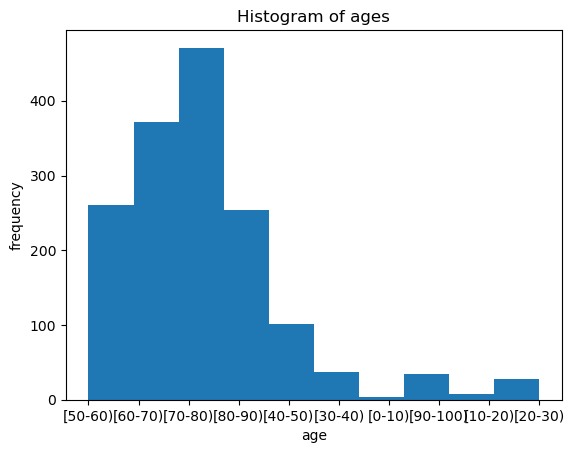

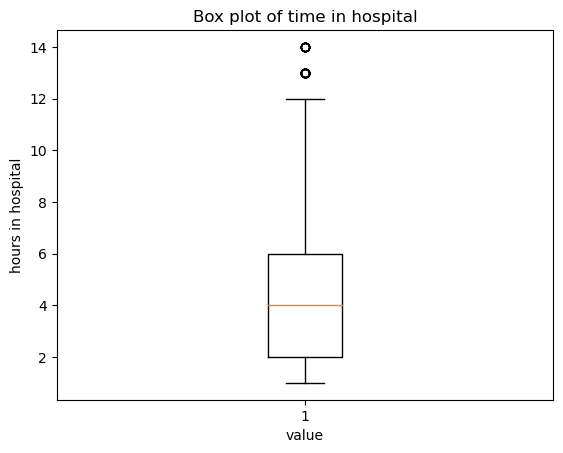

In [8]:
# Distrubution of selected variables 

plt.hist(diabetics.age,bins=10)

plt.title('Histogram of ages')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

plt.boxplot(diabetics.time_in_hospital)
plt.title('Box plot of time in hospital')
plt.xlabel('value')
plt.ylabel('hours in hospital')
plt.show()

In [9]:
# Correlation between the variables to diabeties medication to indicate which factor contributes most to 
# doctors perscribing diabetic medication to patients. Note age and weight were not correlated since 
# the two columns were ranges and not exact for each patient. 

print('The correlation is :',diabetics['race'].corr(diabetics['diabetesMed']))

print('The correlation is :',diabetics['gender'].corr(diabetics['diabetesMed']))

print('The correlation is :',diabetics['time_in_hospital'].corr(diabetics['diabetesMed']))

print('The correlation is :',diabetics['medical_specialty'].corr(diabetics['diabetesMed']))

print('The correlation is :',diabetics['num_lab_procedures'].corr(diabetics['diabetesMed']))

print('The correlation is :',diabetics['num_procedures'].corr(diabetics['diabetesMed']))

print('The correlation is :',diabetics['num_medications'].corr(diabetics['diabetesMed']))

print('The correlation is :',diabetics['number_diagnoses'].corr(diabetics['diabetesMed']))

print('The correlation is :',diabetics['max_glu_serum'].corr(diabetics['diabetesMed']))

print('The correlation is :',diabetics['A1Cresult'].corr(diabetics['diabetesMed']))

# From the correlations we can infer that time in the hospital is one of the leading factors to doctors 
# issuing patients with diabetic medicine since more time in the hospital can contribute to more 
# tests/procedures being done to warrant medication 

print(diabetics.corr())

# The correlation matrix shows the strength on how two variables correlate with one another
# The two variables that strongly correlate with each other is the number of lab procedures and time in the hospotial
# with 0.32 and number of procedures and number of medications with 0.35. Another correlation that has the strongest between two variables is 
# time in the hospital and number of medications with 0.50 

The correlation is : -0.02923787422810581
The correlation is : 0.02982063936584272
The correlation is : 0.12415224802823063
The correlation is : 0.05428888585802655
The correlation is : 0.025962990918790996
The correlation is : -0.006684517585176876
The correlation is : 0.25571099243319023
The correlation is : 0.006721659627265295
The correlation is : nan
The correlation is : -0.08000448398155029
                    encounter_id  patient_nbr      race    gender  \
encounter_id            1.000000     0.064404 -0.032838 -0.000593   
patient_nbr             0.064404     1.000000 -0.028045  0.026934   
race                   -0.032838    -0.028045  1.000000  0.033290   
gender                 -0.000593     0.026934  0.033290  1.000000   
time_in_hospital       -0.071623     0.010068 -0.009224 -0.050585   
medical_specialty       0.039599     0.028724  0.008592 -0.058158   
num_lab_procedures     -0.023672    -0.011400 -0.019840  0.008039   
num_procedures         -0.003189    -0.014184  0

C:\Users\choub\AppData\Local\Temp\ipykernel_24932\3079873669.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(diabetics.corr())


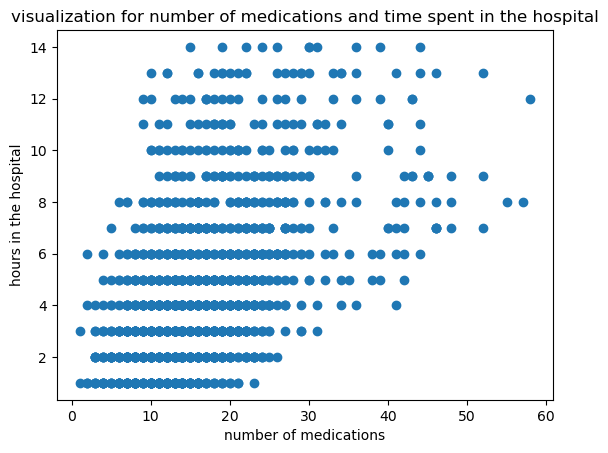

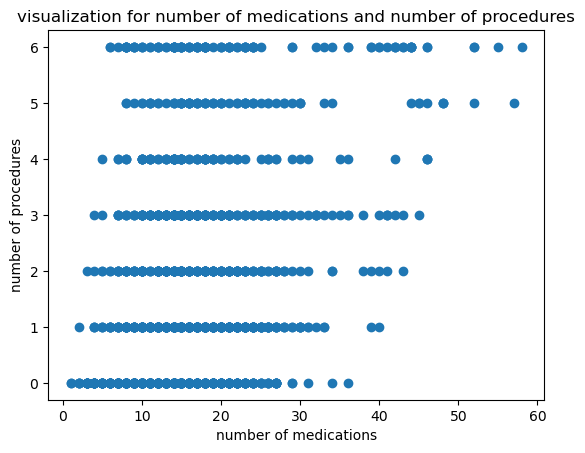

In [10]:
# Visualization with various graphs for variables 
plt.scatter(diabetics.num_medications,diabetics.time_in_hospital)
plt.xlabel('number of medications')
plt.ylabel('hours in the hospital')
plt.title('visualization for number of medications and time spent in the hospital')
plt.show()

plt.scatter(diabetics.num_medications,diabetics.num_procedures)
plt.xlabel('number of medications')
plt.ylabel('number of procedures')
plt.title('visualization for number of medications and number of procedures')
plt.show()

In [11]:
# Hypothesis

# My hypothesis is that the more time spent in the hospital it equates to an 
# increase number of medication for a patient

# To test this, we can use correlation between the two variables to see if time spent in a hospital 
# strongly correlates with an increase number of medication for a patient 

print('The correlation is :',diabetics['time_in_hospital'].corr(diabetics['num_medications']))

# based on the correlation matrix above and the correlation value of 0.50, the more time a patient spends in the hospital
# the more medication the patient has which does match since if a patient stays in a hospital longer, it usually means 
# that further testing must be done with procedures that includes injecting medication to the patient to 
# test for diabetes. Another factor is that a patient's case for determining diabetes is complex due to their 
# genetics that doctors need more time to analyze if a patient has signs of diabetes. The hypothesis is correct since 
# it is the highest correlated variables compared to the others. A 0.50 correlation means that time 
# in the hospital has more impact on a value that wants to be predicted which is number of medications 
# than the other values that time spent in the hospital was compared to. 


The correlation is : 0.5019377498721541


In [12]:
# A limitation is that the data does not take into account years before 1999 and after 2008 which signifies
# that the data size is considered small when looking at what medications and factors contribute to diabetes. 
# A recommendation is to take diabetes data yearly so that diabetes can be tracked yearly for better conclusions 
# on what or how people are getting diabetes. The data is also considering a small sample size of the world's population 
# so it should be noted within the data that anyone that plans to use it should use it as a reference that he or she can 
# incporate into their own medical research. Based on my findings, people that spend more time in the hospitals 
# are administered diabetic medication since doctors ran more lab procedures and procedures. One interesting find 
# was that max glucose serum had the least impact among patients for whether they needed to be adminstered diabetic 
# medication signifying that ever patients glucose levels did not impact diabetes but rather other factors like 
# the amount of medication a patient already takes. A recommendation for further data collection would be 
# to account worldwide since people in other parts of the world can obtain diabetes which can be 
# good tools for research to compare diabetes through other means like food nutrition or enviromental hazards. 

# Part C: Data Questions 

In [13]:
diabetics = pd.read_csv('diabetic_data.csv')

print(diabetics) 

        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_

In [14]:
# 1
print("The demographics for readmitted patients are as follows: \n",diabetics.readmitted.value_counts())

The demographics for readmitted patients are as follows: 
 NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


In [15]:
# 2 
print("The age range of the patients are as follows: \n",diabetics.age.value_counts())

print("The genders of the patients are as follows: \n",diabetics.gender.value_counts())

print("The ethnicities of the patients are as follows: \n",diabetics.race.value_counts())

The age range of the patients are as follows: 
 [70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
The genders of the patients are as follows: 
 Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
The ethnicities of the patients are as follows: 
 Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [16]:
# 3
readmitted_diabetics = diabetics[diabetics['readmitted'] != 'NO']

diagnosis_counts = readmitted_diabetics['diag_1'].value_counts()
source = readmitted_diabetics['admission_source_id'].value_counts()

print("The most common primary diagnosis is: \n",diagnosis_counts)
print("The most common primary procedure is: \n",source)

# From the primary diagnosis being diag_1, it can be inferred that 428 is the primary one account for 
# patient readmittance. While there was no said procedure, the next best option was the admission source id 
# since it notes procedures that were done with the patient to contridute to readmit, based on the key, 
# emergency room procedures was the common procedure for patient readmittance for diabetes

The most common primary diagnosis is: 
 428    4057
414    2720
786    1709
486    1683
410    1438
       ... 
838       1
883       1
734       1
378       1
336       1
Name: diag_1, Length: 614, dtype: int64
The most common primary procedure is: 
 7     28387
1     12770
17     3164
4       981
6       610
2       421
5       337
20      103
3        87
9        29
8         6
22        5
10        2
Name: admission_source_id, dtype: int64


In [17]:
# 4
grouped = diabetics.groupby('readmitted')

mean = grouped['time_in_hospital'].mean()
print("The mean for each category of readmitted patients is: \n",mean)

median = grouped['time_in_hospital'].median()
print("The median for each category of readmitted patients is: \n",median)

std = grouped['time_in_hospital'].std()
print("The std for each category of readmitted patients is: \n",std)

# 0: being readmitted in less than 30 days 
# 1: being readmitted in more than 30 days 
# 2: note being readmitted

The mean for each category of readmitted patients is: 
 readmitted
<30    4.768249
>30    4.495541
NO     4.254429
Name: time_in_hospital, dtype: float64
The median for each category of readmitted patients is: 
 readmitted
<30    4.0
>30    4.0
NO     3.0
Name: time_in_hospital, dtype: float64
The std for each category of readmitted patients is: 
 readmitted
<30    3.028165
>30    2.988064
NO     2.964964
Name: time_in_hospital, dtype: float64


In [18]:
# 5
readmitted_diabetics = diabetics[diabetics['readmitted'] != 'NO']

medications = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',
              'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
              'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin',
              'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

medication_counts = {}
for med in medications: 
    medication_counts[med] = (readmitted_diabetics[med]!='NO').sum()
    
medication_counts_df = diabetics.from_dict(medication_counts,orient='index',columns=['Frequency'])
medication_counts_df = medication_counts_df.sort_values(by='Frequency',ascending=False)
    
print(medication_counts_df)

# Based on the outcomes for the frequency at which each medication comes up, no medication stands 
# out for contributing to the readmitted patients which tells us that other columns play a 
# significant role for readmitted patients

                          Frequency
metformin                     46902
miglitol                      46902
metformin-rosiglitazone       46902
glimepiride-pioglitazone      46902
glipizide-metformin           46902
glyburide-metformin           46902
insulin                       46902
citoglipton                   46902
examide                       46902
tolazamide                    46902
troglitazone                  46902
acarbose                      46902
repaglinide                   46902
rosiglitazone                 46902
pioglitazone                  46902
tolbutamide                   46902
glyburide                     46902
glipizide                     46902
acetohexamide                 46902
glimepiride                   46902
chlorpropamide                46902
nateglinide                   46902
metformin-pioglitazone        46902


In [19]:
# 6 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
diabetics['race'] = le.fit_transform(diabetics.race)

le1 = LabelEncoder()
diabetics['gender'] = le.fit_transform(diabetics.gender)

le2 = LabelEncoder()
diabetics['age'] = le.fit_transform(diabetics.age)

le3 = LabelEncoder()
diabetics['readmitted'] = le.fit_transform(diabetics.readmitted)

print('The correlation for race is: \n',diabetics['race'].corr(diabetics['readmitted']))
print('The correlation for gender is: \n',diabetics['gender'].corr(diabetics['readmitted']))
print('The correlation for age is: \n',diabetics['age'].corr(diabetics['readmitted']))

# When comparing the correlation for race gender and age to readmission, these physical characteristics 
# impact the patient's diabetes very little

The correlation for race is: 
 -0.015184079703613705
The correlation for gender is: 
 0.014532897492073643
The correlation for age is: 
 -0.03027121836934326


In [20]:
# 7
readmitted_diabetics = diabetics[diabetics['readmitted'] != 'NO']

specialty_counts = readmitted_diabetics['medical_specialty'].value_counts()

print(specialty_counts)

# The most common specialty associated with readmitted patients is Internal Medicine since the top 
# occupation is unknown. Even with the ? being replaced with the most common occupation it would still 
# be internal medicine 

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64


In [21]:
# 8 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
diabetics['readmitted'] = le.fit_transform(diabetics.readmitted)

print('The correlation for number of lab procedures is: \n',diabetics['num_lab_procedures'].corr(diabetics['readmitted']))

# This shows that the number of lab procedures is not a significant factor for patient readmittance 

The correlation for number of lab procedures is: 
 -0.03797639313067912


# DUE DATE: Thursday, June 29, 2023